# Modeling

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans

import env

import warnings
warnings.filterwarnings("ignore")

## First lets bring in our data: seaborn Iris dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Next let's make a two new columns for petal area and sepal area

In [3]:
iris['petal_area'] = iris.petal_width * iris.petal_length
iris['sepal_area'] = iris.sepal_width * iris.sepal_length
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


### Next let's make predictions with KMeans

In [4]:
X = iris[['petal_area', 'sepal_area']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
134,6.1,2.6,5.6,1.4,virginica,7.84,15.86,cluster_3
44,5.1,3.8,1.9,0.4,setosa,0.76,19.38,cluster_1
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00,cluster_1
83,6.0,2.7,5.1,1.6,versicolor,8.16,16.20,cluster_3
21,5.1,3.7,1.5,0.4,setosa,0.60,18.87,cluster_1
78,6.0,2.9,4.5,1.5,versicolor,6.75,17.40,cluster_3
36,5.5,3.5,1.3,0.2,setosa,0.26,19.25,cluster_1
100,6.3,3.3,6.0,2.5,virginica,15.00,20.79,cluster_2
122,7.7,2.8,6.7,2.0,virginica,13.40,21.56,cluster_2
18,5.7,3.8,1.7,0.3,setosa,0.51,21.66,cluster_1


### Lets see how our predictions turned out

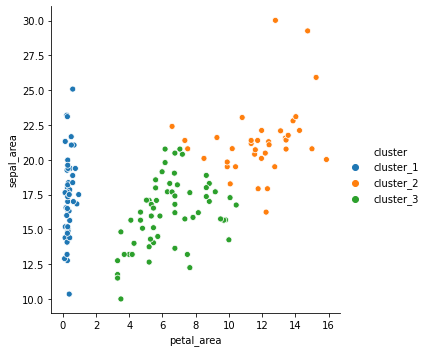

In [5]:
iris.cluster.astype('object')
sns.relplot(data=iris, x='petal_area', y='sepal_area', hue='cluster')

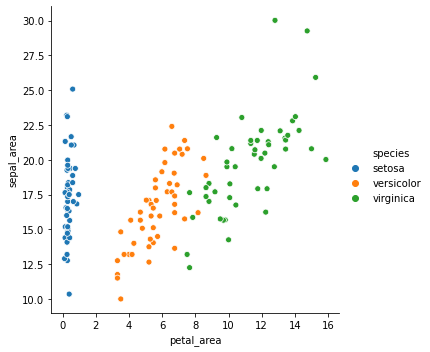

In [6]:
sns.relplot(data=iris, x='petal_area', y='sepal_area', hue='species')

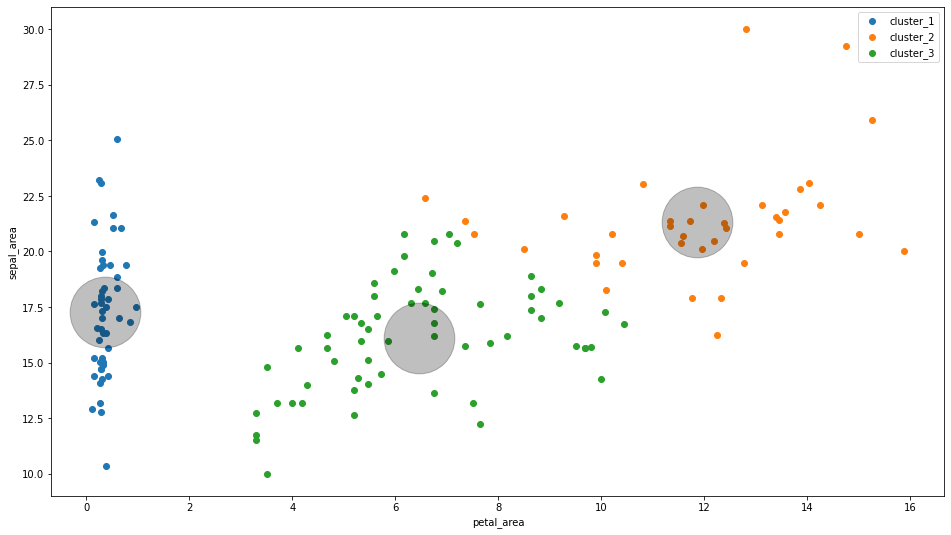

In [7]:
plt.figure(figsize=(16, 9))
for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.petal_area, subset.sepal_area, label=cluster)
    
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

centroids.plot.scatter(y='sepal_area', x='petal_area', ax=plt.gca(), alpha=.25, s=5000, c='black')
plt.legend()

### Next let's look at the inertia plot for this set of features

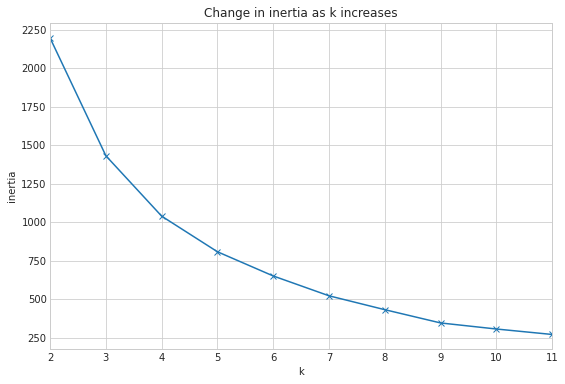

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Now let's use do it again with three features

In [9]:
X = iris[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
17,5.1,3.5,1.4,0.3,setosa,0.42,17.85,1
147,6.5,3.0,5.2,2.0,virginica,10.40,19.50,2
134,6.1,2.6,5.6,1.4,virginica,7.84,15.86,2
70,5.9,3.2,4.8,1.8,versicolor,8.64,18.88,0
114,5.8,2.8,5.1,2.4,virginica,12.24,16.24,0
85,6.0,3.4,4.5,1.6,versicolor,7.20,20.40,0
10,5.4,3.7,1.5,0.2,setosa,0.30,19.98,1
148,6.2,3.4,5.4,2.3,virginica,12.42,21.08,2
13,4.3,3.0,1.1,0.1,setosa,0.11,12.90,1
65,6.7,3.1,4.4,1.4,versicolor,6.16,20.77,0


### Let's see what a 3d plot of all three features looks like

Text(0.5, 0, 'petal_width')

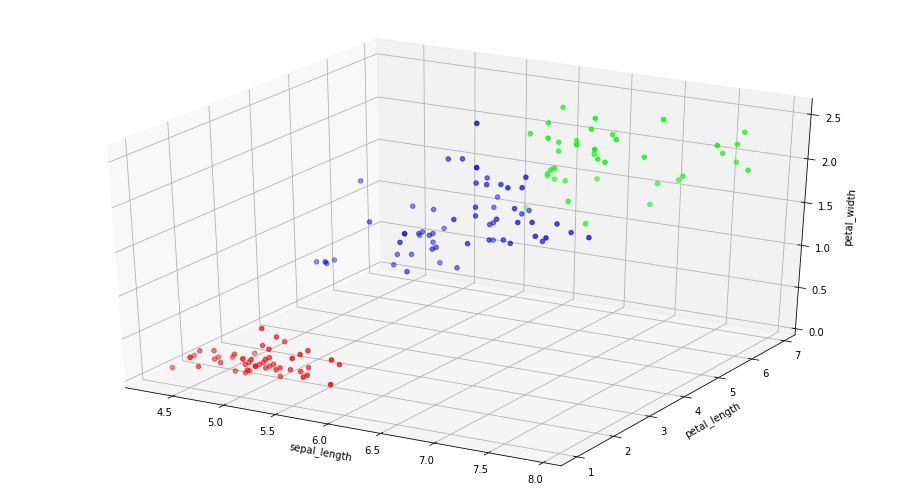

In [10]:
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

ax.scatter3D(iris.sepal_length, iris.petal_length, iris.petal_width, c=iris.cluster, cmap='brg')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')

### Let's do a pairplot now to see how each feature looks with the other and we will again highlight the clusters

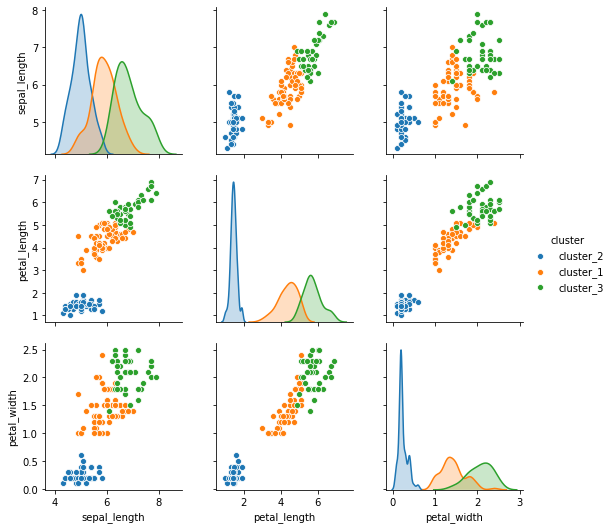

In [11]:
df = iris[['sepal_length', 'petal_length', 'petal_width', 'species', 'cluster']]
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.pairplot(df, hue='cluster')

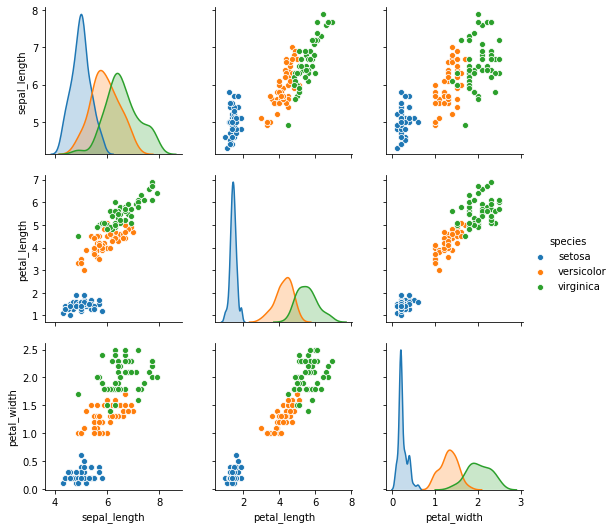

In [12]:
df = iris[['sepal_length', 'petal_length', 'petal_width', 'species', 'cluster']]
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.pairplot(df, hue='species')

## Now let's bring in some new data: Mall Customers

In [13]:
query = '''
SELECT *
FROM customers
'''

url = env.get_url('mall_customers')

mall = pd.read_sql(query, url, index_col='customer_id')
mall

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Here we can see that the `annual_income` and `spending_score` columns look to be in about 5 distict groups

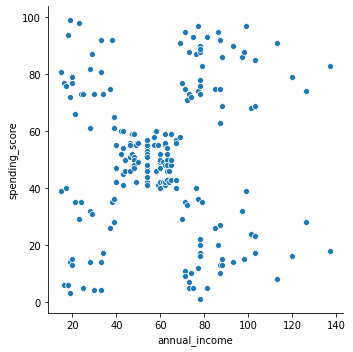

In [14]:
sns.relplot(x='annual_income', y='spending_score', data=mall)

### Let's use KMeans to see if this is true, first let's use an elbow graph to see what the best $k$ are.

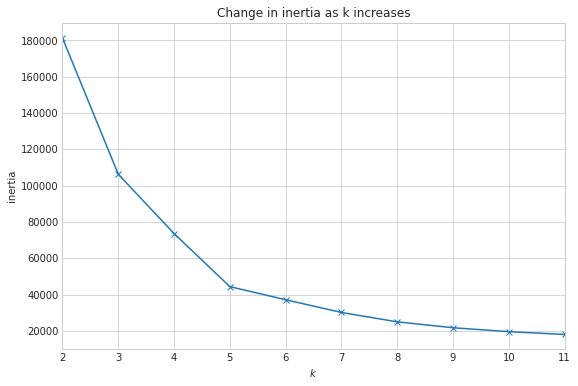

In [15]:
X = mall[['annual_income', 'spending_score']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('$k$')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### As we can see here, the graph flattens out after $k=5$.

### Let's plot $k=2$ to $k=5$ to check this.

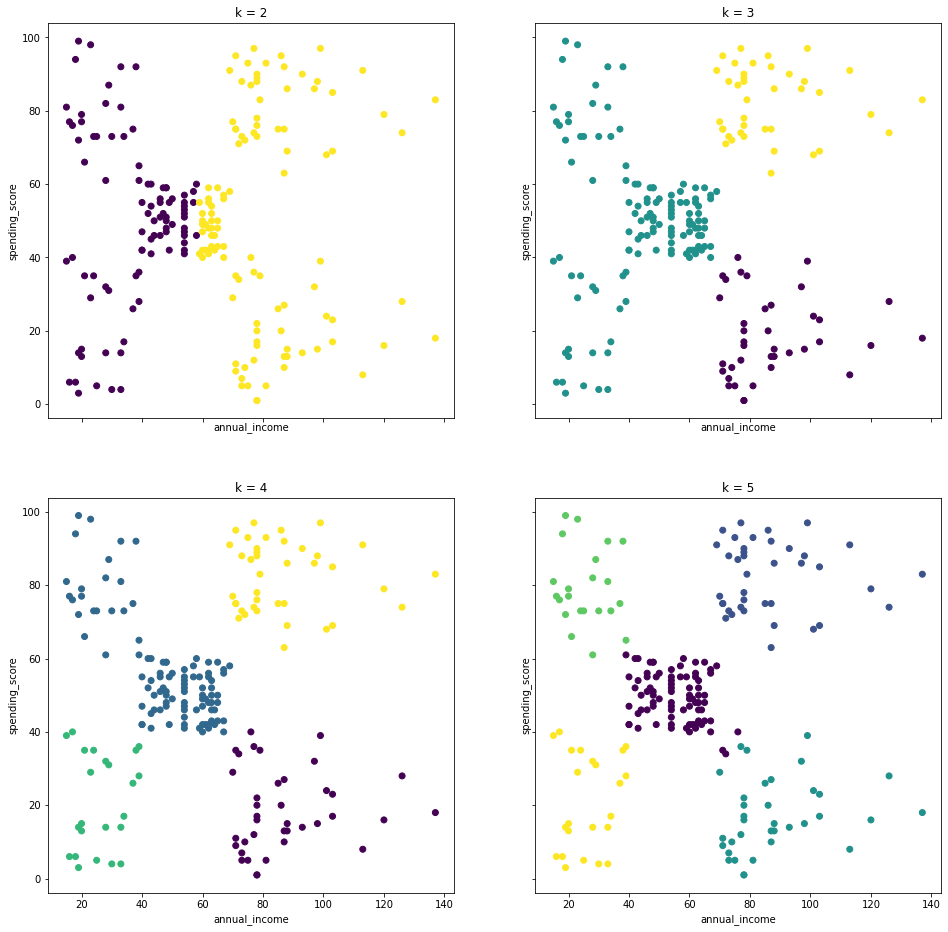

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

### Since $k=5$ looks the best, let's continue with is and see what else we find with it.

In [23]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

mall['n_cluster'] = kmeans.predict(X)
mall['s_cluster'] = 'cluster_' + (mall.n_cluster).astype('str')
mall

,gender,age,annual_income,spending_score,n_cluster,s_cluster
customer_id,,,,,,
1,Male,19,15,39,0,cluster_0
2,Male,21,15,81,4,cluster_4
3,Female,20,16,6,0,cluster_0
4,Female,23,16,77,4,cluster_4
5,Female,31,17,40,0,cluster_0
...,...,...,...,...,...,...
196,Female,35,120,79,1,cluster_1
197,Female,45,126,28,3,cluster_3
198,Male,32,126,74,1,cluster_1


### Let's look at our centers

In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,spending_score
0,26.304348,20.913043
1,86.538462,82.128205
2,55.296296,49.518519
3,88.200000,17.114286
4,25.727273,79.363636


### And let's plot them on a scatter of our features

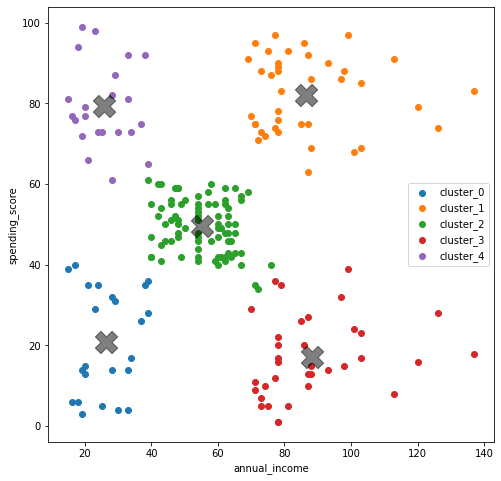

In [49]:
plt.figure(figsize=(8, 8))
for cluster, subset in mall.groupby('s_cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label=cluster)

centroids.plot.scatter(x='annual_income', y='spending_score', ax=plt.gca(), marker='X', alpha=.5, s=500, c='black')
plt.legend()

### Lastly let's use a pairplot to how the clusters interact with our other columns

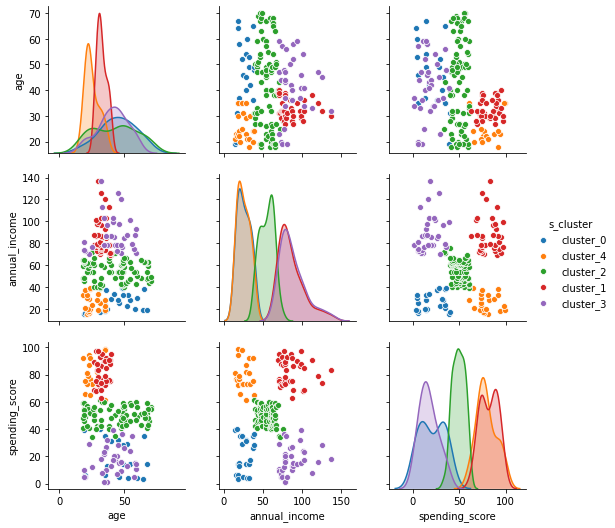

In [24]:
sns.pairplot(mall.drop(columns='n_cluster'), hue='s_cluster')